In [13]:
import scipy.io as io
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv1D, MaxPool2D, Flatten
from keras.utils import np_utils
from keras.losses import BinaryCrossentropy
import tensorflow as tf

data = io.loadmat("WLDataCW.mat")
print('length is ' + str(len(data)))
print(data.keys())
print(data['__globals__'])
data_only =  data["data"]
label = data["label"]
print(data_only.shape)
print(label.shape)
data_only=data_only.T
label=label.T
X_train, X_test, y_train, y_test = train_test_split(data_only, label, test_size=0.25, random_state=42)



length is 5
dict_keys(['__header__', '__version__', '__globals__', 'data', 'label'])
[]
(62, 512, 360)
(1, 360)


In [14]:
cnn = tf.keras.models.Sequential()



In [15]:

cnn.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(512, 62, 1)))
cnn.add(tf.keras.layers.MaxPooling2D((2, 2)))

In [16]:
cnn.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
cnn.add(tf.keras.layers.MaxPooling2D((2, 2)))

In [17]:
cnn.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
cnn.add(tf.keras.layers.MaxPooling2D((2, 2)))

In [18]:
cnn.add(tf.keras.layers.Conv2D(50, (3, 3), activation='relu'))

In [19]:
cnn.add(tf.keras.layers.Flatten())

In [20]:
cnn.add(tf.keras.layers.Dense(units = 100, activation = 'relu'))
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [21]:

cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics=['accuracy'])


In [22]:

history = cnn.fit(X_train, y_train,
                batch_size=25,
                epochs=50,
                validation_data=(X_test, y_test))



Epoch 1/50
11/11 [==============================] - 5s 411ms/step - loss: 2.4508 - accuracy: 0.5444 - val_loss: 0.6118 - val_accuracy: 0.7667
Epoch 2/50
11/11 [==============================] - 4s 397ms/step - loss: 0.6542 - accuracy: 0.6185 - val_loss: 0.5354 - val_accuracy: 0.8000
Epoch 3/50
11/11 [==============================] - 4s 400ms/step - loss: 0.5146 - accuracy: 0.8074 - val_loss: 0.4467 - val_accuracy: 0.8444
Epoch 4/50
11/11 [==============================] - 4s 395ms/step - loss: 0.4327 - accuracy: 0.8444 - val_loss: 0.3168 - val_accuracy: 0.9222
Epoch 5/50
11/11 [==============================] - 4s 395ms/step - loss: 0.3121 - accuracy: 0.9148 - val_loss: 0.2022 - val_accuracy: 0.9222
Epoch 6/50
11/11 [==============================] - 4s 394ms/step - loss: 0.2149 - accuracy: 0.9370 - val_loss: 0.2152 - val_accuracy: 0.9222
Epoch 7/50
11/11 [==============================] - 4s 396ms/step - loss: 0.1573 - accuracy: 0.9667 - val_loss: 0.1469 - val_accuracy: 0.9667
Epoch 

3/3 - 0s - loss: 0.2174 - accuracy: 0.9444 - 272ms/epoch - 91ms/step


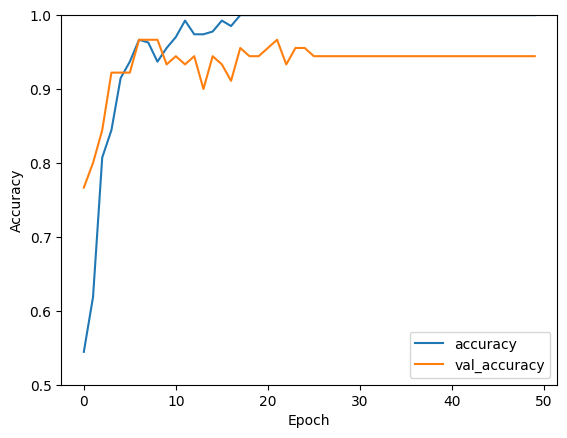

In [23]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = cnn.evaluate(X_test,  y_test, verbose=2)

In [24]:
print(test_acc)

0.9444444179534912
